In [1]:
# Load the dataset
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)
# Check for missing values
print("Missing values in each column:\n", X.isnull().sum())

Missing values in each column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [5]:
print("Dataset shape (rows, columns):", X.shape)
print("Column headings:", X.columns.tolist())
print("First 5 rows:\n", X.head())

Dataset shape (rows, columns): (150, 4)
Column headings: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
First 5 rows:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [8]:
# prompt: Train a decision tree classifier to predict iris species and Evaluate using accuracy, precision, and recall.

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class

print(f"\nModel Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Model Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000


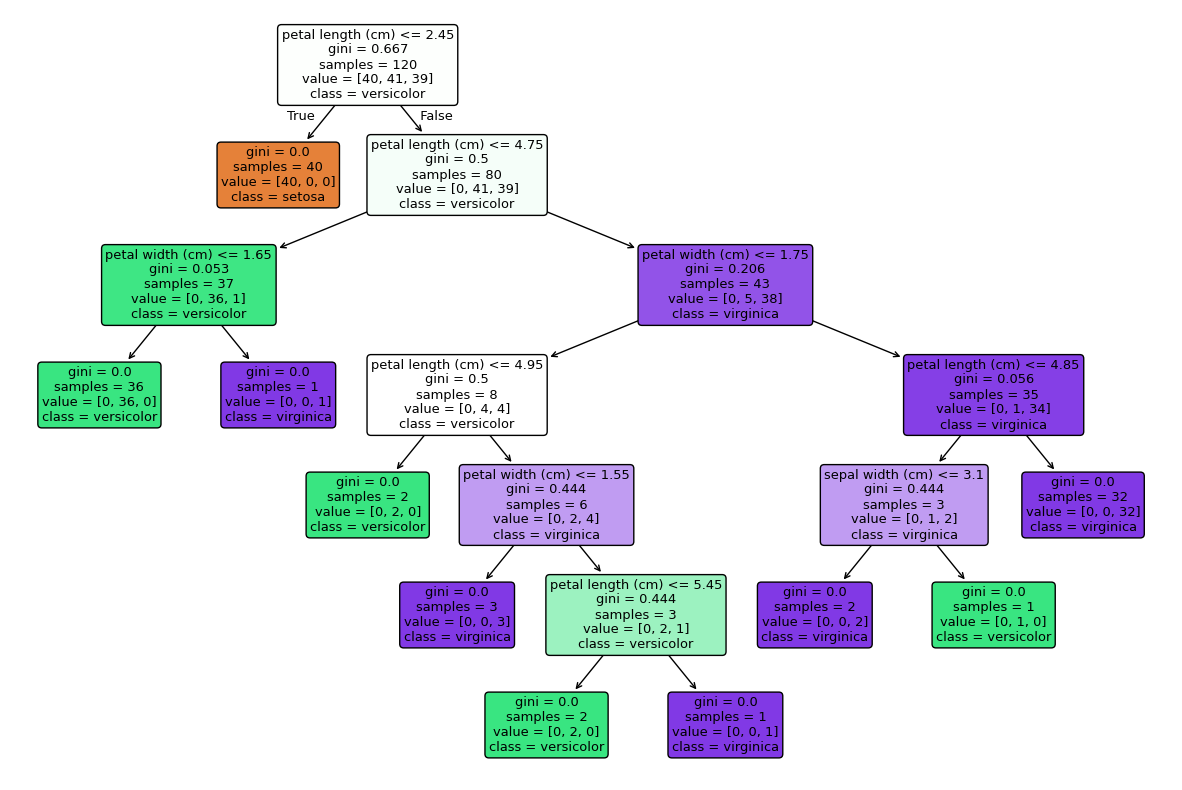

In [9]:
# prompt: Visualize the decision tree

!pip install scikit-learn matplotlib graphviz

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()

In [13]:
# Save the model using joblib
import joblib
joblib.dump(clf, 'iris_decision_tree_model.joblib')


['iris_decision_tree_model.joblib']

In [14]:
# Load the model
loaded_clf = joblib.load('iris_decision_tree_model.joblib')

In [15]:
# Predict using the loaded model
loaded_y_pred = loaded_clf.predict(X)

In [16]:
# Evaluate the loaded model
print("Loaded Model Accuracy:", accuracy_score(y, loaded_y_pred))
print("Loaded Model Precision:", precision_score(y, loaded_y_pred, average='weighted'))
print("Loaded Model Recall:", recall_score(y, loaded_y_pred, average='weighted'))

Loaded Model Accuracy: 0.9866666666666667
Loaded Model Precision: 0.9866666666666667
Loaded Model Recall: 0.9866666666666667


In [17]:
# Clean up the generated files
import os
if os.path.exists("iris_decision_tree.png"):
    os.remove("iris_decision_tree.png")
if os.path.exists("iris_decision_tree_model.joblib"):
    os.remove("iris_decision_tree_model.joblib")
# End of the script